# HR Department - Attrition Prediction #

---

# Table Contents:


#### 1. Introduction
#### 2. Problem Statement
#### 3. Importing necessary libraries
#### 4. Data Acquisition 
#### 5. Download the data and examine
#### 6. Data Pre-profiling
#### 7. Data Pre-processing
#### 8. Data Post-profiling
#### 9. EDA
#### 10. Data Encoding
#### 11. Train and Test split
#### 12. Data Standardization
#### 13. Building various models
#### 14. Hyperparameter tuning
#### 15. Evaluation after tuning
#### 16. Cross Validating the models
#### 17. Unseen Data Analysis
#### 18. Predict the label values using the earlier trained Random Forest Regression Model

## **1. Introduction**

- HR department at a Software Company want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.

**Current Practice**
- Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

**This suffers from the following problems:**

- This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The second problem is these insights can't be aggregated and interlaced across all employees who have left.
- The third is that it is too late by the time the proposed policy changes take effect.

- The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.


## **2. Problem Statement**



###Your Role
We are given datasets of past employees and their status (still employed or already left).
The task is to build a classification model using the datasets.
Because there was no machine learning model for this problem in the company, there is no quantifiable win condition. We need to build the best possible model.

###Problem Specifics
**Deliverable:** Predict whether an employee will stay or leave. 

**Machine learning task:** Classification

**Target variable:** Status (Employed/Left)

**Win condition:** N/A (best possible model)

## **3. Importing Libraries**

In [3]:
!pip install mysql-connector-python pydotplus --upgrade scikit-learn

In [4]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import mysql.connector as sql                                       # SQL connector to import data
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.neighbors import KNeighborsClassifier                  # To import KNN Classifier
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier
from sklearn.linear_model import LogisticRegression                 # To instantiate a Logistic Regression Classifier
from sklearn.naive_bayes import GaussianNB                          # To instantiate a Naive Bayes Classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import confusion_matrix                   # To plot confusion matrix
from sklearn.metrics import mean_squared_log_error                  # To derive Root mean squared log error
import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models
from sklearn.metrics import accuracy_score                          # To calculate the accuracy of classifiers

#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing to calculate tim
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

## **4. Data Acquisition**

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

**department_data**

This dataset contains information about each department. The schema of the dataset is as follows:

**dept_id** – Unique Department Code  
**dept_name** – Name of the Department  
**dept_head** – Name of the Head of the Department  

**employee_details_data**

This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

**employee_id** – Unique ID Number for each employee  
**age** – Age of the employee  
**gender** – Gender of the employee  
**marital_status** – Marital Status of the employee  

**employee_data**

This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

####**Target variable**

**status** – Current employment status (Employed / Left)

***Administrative information***

**department** – Department to which the employees belong(ed) to  
**salary** – Salary level with respect to rest of their department  
**tenure** – Number of years at the company  
**recently_promoted** – Was the employee promoted in the last 3 years?  
**employee_id** – Unique ID Number for each employee  

***Workload information***

**n_projects** – Number of projects employee has worked on   
**avg_monthly_hrs** – Average number of hours worked per month

***Mutual evaluation information***

**satisfaction** – Score for employee’s satisfaction with the company (higher is better)  
**last_evaluation** – Score for most recent evaluation of employee (higher is better)  
**filed_complaint** – Has the employee filed a formal complaint in the last 3 years?

## 5. Download the data and examine ##

In [5]:
    
#Downloading the department_data table from the Capstone2 dtabase in SQL
connection = sql.connect(host='cpanel.insaid.co',
                                         database='Capstone2',
                                         user='student',
                                         password='student')
    
cursor = connection.cursor()

cursor.execute('SELECT * FROM department_data')

table_rows = cursor.fetchall()

department_df = pd.DataFrame(table_rows)

department_df=pd.read_sql_query("SELECT * FROM department_data ",connection)

department_df.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [6]:
department_df.shape

(11, 3)

In [7]:
    
#Downloading the employee_details_data table from the Capstone2 dtabase in SQL
    
cursor_2 = connection.cursor()

cursor_2.execute('SELECT * FROM employee_details_data')

table_rows = cursor_2.fetchall()

employee_details_df = pd.DataFrame(table_rows)

employee_details_df=pd.read_sql_query("SELECT * FROM employee_details_data ",connection)

employee_details_df.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [8]:
employee_details_df.shape

(14245, 4)

In [9]:
    
#Downloading the employee_data table from the Capstone2 dtabase in SQL
    
cursor_3 = connection.cursor()

cursor_3.execute('SELECT * FROM employee_data')

table_rows = cursor_3.fetchall()

employee_data = pd.DataFrame(table_rows)

employee_data =pd.read_sql_query("SELECT * FROM employee_data ",connection)

employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [10]:
employee_data.shape

(14150, 11)

In [11]:
employee_data.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object')

In [12]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [13]:
## Observations for Initial Analysis of datasets from 3 tables:

#### 1. 'employee_id' is a common column in both employee_data and employee_details_df and can be used to join the two databases
#### 2. 'department' column in employee_data and 'dept_id' in department_df are common and can be used to join the two tables

In [14]:
emp = employee_data.merge(employee_details_df, how = 'left', on = 'employee_id')
emp.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried


In [15]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
 11  age                14145 non-null  float64
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 1.6+ MB


In [16]:
Employee_df = emp.merge(department_df, how = 'left', left_on='department' , right_on='dept_id')
Employee_df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married,NaN,NaN,NaN
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,NaN,NaN,NaN
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married,D00-SP,Support,Amelia Westray
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried,D00-SS,Sales,Edward J Bayley


In [17]:
Employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
 11  age                14145 non-null  float64
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
 14  dept_id            13236 non-null  object 
 15  dept_name          13236 non-null  object 
 16  dept_head          132

## 6. Data Pre-profiling

This step involves identifying issues with the data before further analysis. The following areas need to be investigated:

*   Missing data
*   Duplicate Data
*   Inconsistent data - Inaccuracies, Casing etc.
*   Irregular Data (Outliers)





In [18]:
Employee_df[Employee_df['dept_id'].isnull()].head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married,NaN,NaN,NaN
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,NaN,NaN,NaN
25,155.0,None,NaN,0.464598,2,NaN,medium,0.414451,Left,3.0,127792,23.0,Female,Unmarried,NaN,NaN,NaN
28,156.0,None,NaN,NaN,2,NaN,medium,0.465747,Left,3.0,128509,25.0,Female,Unmarried,NaN,NaN,NaN
40,233.0,None,NaN,0.965382,5,NaN,medium,0.962314,Left,5.0,125077,22.0,Female,Unmarried,NaN,NaN,NaN


In [19]:
Employee_df.loc[Employee_df['dept_id'].isnull()]['department'].value_counts()

-IT    207
Name: department, dtype: int64

In [20]:
department_df['dept_id'].value_counts()

D00-MT     1
D00-MN     1
D00-SS     1
D00-AD     1
D00-FN     1
D00-IT     1
D00-SP     1
D00-PD     1
D00-PR     1
D00-ENG    1
D00-TP     1
Name: dept_id, dtype: int64

In [21]:
Employee_df['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [22]:
Employee_df[Employee_df["department"] == "D00-AD"].shape

(175, 17)

In [23]:
# Replace department values for 207 records where dept_id is missing and department == '_IT'

In [24]:
Employee_df[Employee_df['recently_promoted'].notnull()]['recently_promoted'].value_counts()

1.0    297
Name: recently_promoted, dtype: int64

In [25]:
# Check for Missing Data

Employee_df.isna().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12104
last_evaluation       1487
n_projects               0
recently_promoted    13853
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
age                      5
gender                   5
marital_status           5
dept_id                914
dept_name              914
dept_head              914
dtype: int64

In [26]:
# Missing data with percentages for each column

for col in Employee_df.columns:
    pct_missing = np.mean(Employee_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

avg_monthly_hrs - 0%
department - 5%
filed_complaint - 86%
last_evaluation - 11%
n_projects - 0%
recently_promoted - 98%
salary - 0%
satisfaction - 1%
status - 0%
tenure - 1%
employee_id - 0%
age - 0%
gender - 0%
marital_status - 0%
dept_id - 6%
dept_name - 6%
dept_head - 6%


In [27]:
# Check for Duplicate Data

Employee_df.duplicated().any()

True

In [28]:
Employee_df["is_duplicate"]= Employee_df.duplicated()

In [29]:
Employee_df["is_duplicate"].value_counts()

False    14121
True        29
Name: is_duplicate, dtype: int64

In [30]:
Employee_df['filed_complaint'].value_counts()

1.0    2046
Name: filed_complaint, dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'avg_monthly_hrs'),
  Text(2, 0, 'filed_complaint'),
  Text(3, 0, 'last_evaluation'),
  Text(4, 0, 'n_projects'),
  Text(5, 0, 'recently_promoted'),
  Text(6, 0, 'satisfaction'),
  Text(7, 0, 'tenure'),
  Text(8, 0, 'employee_id'),
  Text(9, 0, 'age'),
  Text(10, 0, 'is_duplicate')])

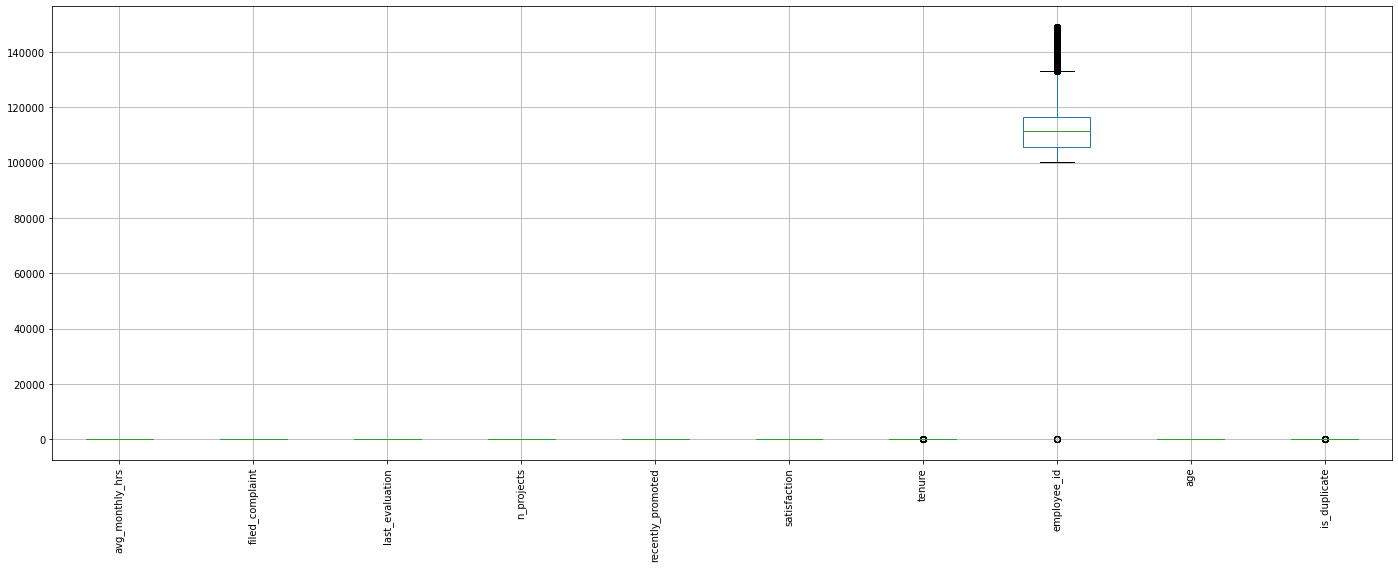

In [31]:
# Cheking for outliers

Employee_df.boxplot(figsize=(24,10))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)

In [32]:
# For Data Pre-processing, following observations have been made:

# 1. 29 records are duplicate which need to be dropped
# 2. Missing data in several columns, need to drop at row and column levels or replaced with Median, Mode
# 3. Missing data in filed_complaint - replace with mode - 0
# 4. Missing data in last_evaluation - replace with Median
# 5. Before joining department and Employee tables, correct the '-IT' department in Employee table
# 6. Missing value in satisfaction - Replace with median
# 7. Missing value in tenure - Replace with median
# 8. Missing value in age - Replace with median
# 9. Missing value in marital_status, gender - replace with mode
# 10. There are no outliers in the dataset
# 11. There are 707 records where no department details are mentioned. These records will be dropped.

<AxesSubplot:ylabel='status'>

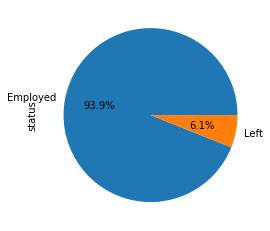

In [33]:
promoted = Employee_df.loc[Employee_df['recently_promoted'].notnull()]
promoted['status'].value_counts().plot(kind = 'pie', autopct="%3.1f%%")

<AxesSubplot:ylabel='status'>

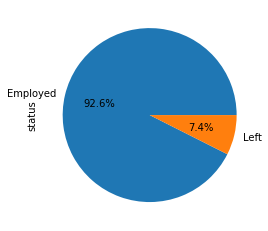

In [34]:
complaints = Employee_df.loc[Employee_df['filed_complaint'].notnull()]
complaints['status'].value_counts().plot(kind = 'pie', autopct="%3.1f%%")

<AxesSubplot:>

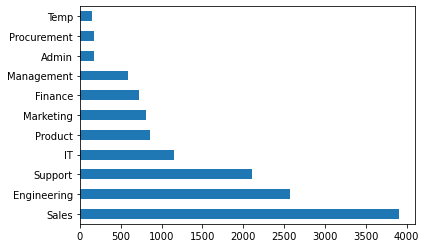

In [35]:
Employee_df['dept_name'].value_counts().plot(kind = 'barh')

In [36]:
Employee_df.skew()

avg_monthly_hrs       0.017220
filed_complaint       0.000000
last_evaluation      -0.065817
n_projects            0.315634
recently_promoted     0.000000
satisfaction         -0.474783
tenure                1.858239
employee_id           0.462453
age                   0.700299
is_duplicate         22.023531
dtype: float64

In [37]:
Employee_df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14000.000000,14000.000000,14150.000000,14145.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,0.621212,3.499357,112080.750247,32.898621
std,50.833697,0.0,0.173108,1.250162,0.0,0.250482,1.462584,8748.202856,9.978939
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000,22.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,0.450356,3.000000,105772.500000,24.000000
50%,199.000000,1.0,0.724731,4.000000,1.0,0.652394,3.000000,111291.500000,29.000000
75%,245.000000,1.0,0.871409,5.000000,1.0,0.824925,4.000000,116650.750000,41.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000,57.000000


### **Observations:**

1. An employee has worked a minimum of 49 hours per month on an average. 50% of the people have spent less than 200 hours per month on an average. 

2. Out of total of 14150 employees, there have been around 2046 complaints filed in the last three years -- Need to check if a complaint has been filed by the same employee more than once

3. The employee has been part of minimum 1 project and on an average 4 projects

4. There are only 297 promotions that have happened in the last 3 years

5. An employee has been part of the organization for minimum 2 years and maximum 10 years.On an average, people have been with the organization for minimum 3 years.

6. Minimum age of an employee is 22 years and maximum 57 years. Average age of the employee is 29 years old.

7. It has been observed that there are people who have been promoted in the last three years have also left the company

8. 152 employees from all the employees who filed a complaint have left the company.

9. There are 707 records where department, dept_name and dept_head details are missing. 

## **7 Data Pre-processing**

This step involves cleaning the data as per observations made in Step 5. This can be done through the following:

*   Imputing Missing Values
*   Dropping Duplicate records
*   Dropping unnecssary and redundant records/columns
*   Removing Outliers
*   Correcting data inconsistencies




In [38]:
# Updating the 'department' column in Employee_details_df dataset

employee_data['department'] = np.where(employee_data['department'] == '-IT', 'D00-IT', employee_data['department'])

In [39]:
employee_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [40]:
emp = employee_data.merge(employee_details_df, how = 'left', on = 'employee_id')
emp.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried


In [41]:
Employee_df = emp.merge(department_df, how = 'left', left_on='department' , right_on='dept_id')
Employee_df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married,NaN,NaN,NaN
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,NaN,NaN,NaN
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married,D00-SP,Support,Amelia Westray
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried,D00-SS,Sales,Edward J Bayley


In [42]:
Employee_df['recently_promoted'].value_counts()

1.0    297
Name: recently_promoted, dtype: int64

In [43]:
Employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
 11  age                14145 non-null  float64
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
 14  dept_id            13443 non-null  object 
 15  dept_name          13443 non-null  object 
 16  dept_head          134

In [44]:
# Identifying records where department details are missing

dep = Employee_df[Employee_df['department'].isna()]
dep.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married,NaN,NaN,NaN
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,NaN,NaN,NaN
25,155.0,None,NaN,0.464598,2,NaN,medium,0.414451,Left,3.0,127792,23.0,Female,Unmarried,NaN,NaN,NaN
28,156.0,None,NaN,NaN,2,NaN,medium,0.465747,Left,3.0,128509,25.0,Female,Unmarried,NaN,NaN,NaN
40,233.0,None,NaN,0.965382,5,NaN,medium,0.962314,Left,5.0,125077,22.0,Female,Unmarried,NaN,NaN,NaN


In [45]:
def data_prep(data):

  # 29 records are duplicate which need to be dropped
  data.drop_duplicates(inplace = True)

  #Missing data in filed_complaint, recently_promoted - replace with mode - 0
  data['filed_complaint'] = np.where(data['filed_complaint'].isna(), 0.0, data['filed_complaint'])
  data['recently_promoted'] = np.where(data['recently_promoted'].isna(), 0.0, data['recently_promoted'])

  #Missing values in last_evaluation, satisfaction, age, tenure - replace with median
  data['last_evaluation'] = np.where(data['last_evaluation'].isna(), data['last_evaluation'].median(skipna = True), data['last_evaluation'])
  data['satisfaction'] = np.where(data['satisfaction'].isna(), data['satisfaction'].median(skipna = True), data['satisfaction'])
  data['tenure'] = np.where(data['tenure'].isna(), data['tenure'].median(skipna = True), data['tenure'])
  data['age'].fillna(value=data['age'].median(), inplace=True)

  #Missing values in marital_status, gender - replace with mode
  data['gender'] = data['gender'].fillna(value=data['gender'].mode()[0])
  data['marital_status'] = data['marital_status'].fillna(value=data['marital_status'].mode()[0])

  return data


In [46]:
Employee_df1 = data_prep(Employee_df)

In [47]:
# Drop the 707 records where department field is null

Employee_df_final = Employee_df1[Employee_df1['department'].notnull()]

In [48]:
#drop the dept_id and Employee_id columns
Employee_df_final.drop(labels=['dept_id', 'employee_id'], axis=1, inplace=True)


## **8. Data Post-profiling**

In [49]:
Employee_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13414 entries, 2 to 14120
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13414 non-null  float64
 1   department         13414 non-null  object 
 2   filed_complaint    13414 non-null  float64
 3   last_evaluation    13414 non-null  float64
 4   n_projects         13414 non-null  int64  
 5   recently_promoted  13414 non-null  float64
 6   salary             13414 non-null  object 
 7   satisfaction       13414 non-null  float64
 8   status             13414 non-null  object 
 9   tenure             13414 non-null  float64
 10  age                13414 non-null  float64
 11  gender             13414 non-null  object 
 12  marital_status     13414 non-null  object 
 13  dept_name          13414 non-null  object 
 14  dept_head          13414 non-null  object 
dtypes: float64(7), int64(1), object(7)
memory usage: 1.6+ MB


In [50]:
Employee_df_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,dept_name,dept_head
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,24.0,Female,Unmarried,Sales,Edward J Bayley
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,51.0,Female,Married,Support,Amelia Westray
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,23.0,Female,Unmarried,Sales,Edward J Bayley
5,135.0,D00-MT,0.0,0.482184,2,0.0,low,0.381545,Left,3.0,23.0,Female,Unmarried,Marketing,Reuben Swann
6,270.0,D00-PD,0.0,0.867087,6,0.0,low,0.172575,Left,4.0,24.0,Female,Unmarried,Product,Darcy Staines


In [51]:
Employee_df_final.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,age
count,13414.000000,13414.000000,13414.000000,13414.000000,13414.000000,13414.000000,13414.000000,13414.000000
mean,200.055241,0.145743,0.718980,3.783584,0.021023,0.622457,3.498956,32.930744
std,50.850136,0.352862,0.163583,1.250445,0.143466,0.249116,1.465920,9.974786
min,49.000000,0.000000,0.316175,1.000000,0.000000,0.040058,2.000000,22.000000
25%,155.000000,0.000000,0.579698,3.000000,0.000000,0.454246,3.000000,24.000000
50%,199.000000,0.000000,0.724484,4.000000,0.000000,0.652517,3.000000,29.000000
75%,245.000000,0.000000,0.856488,5.000000,0.000000,0.823850,4.000000,41.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,57.000000


In [52]:
# Missing data with percentages for each column

for col in Employee_df_final.columns:
    pct_missing = np.mean(Employee_df_final[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

avg_monthly_hrs - 0%
department - 0%
filed_complaint - 0%
last_evaluation - 0%
n_projects - 0%
recently_promoted - 0%
salary - 0%
satisfaction - 0%
status - 0%
tenure - 0%
age - 0%
gender - 0%
marital_status - 0%
dept_name - 0%
dept_head - 0%


## **9. Exploratory Data Analysis**



#### **Q1. What is the attrition rate of the company?**

<AxesSubplot:>

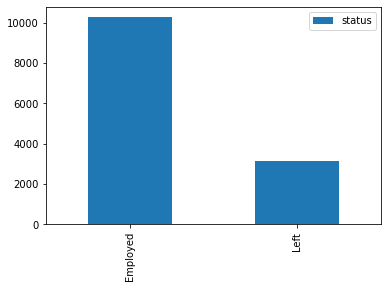

In [53]:
# What is the attrition rate of the company

Employee_df_final['status'].value_counts().plot(kind = 'bar', legend = True)



(8.5, -0.5)

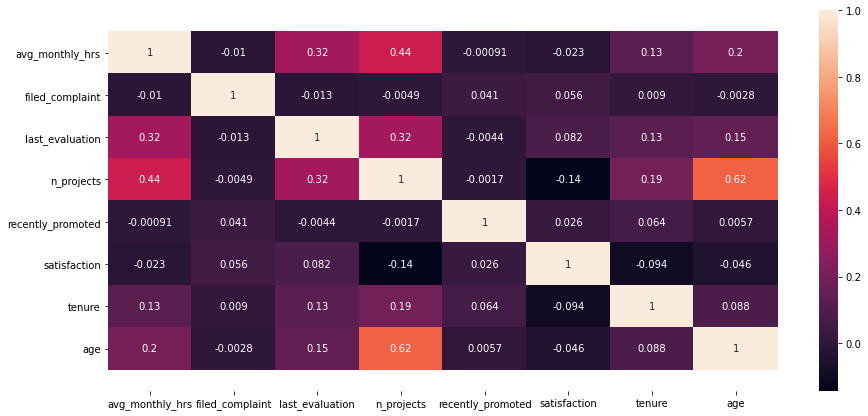

In [54]:
fig = plt.figure(figsize= (15,7))
ax = sns.heatmap(Employee_df_final.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**Observations:**

1. There is high correlation between the number of projects undertaken by an employee and the age of the employee.
2. There is medium correlation between the number of projects undertaken by an employee and the average monthly hours spent

In [55]:
#Employee_df_final['status' == 'Left'].value_counts()
#.plot(kind = 'bar')

#### **Q2. Is there a correlation between the satisfaction score and people who have left the company?**

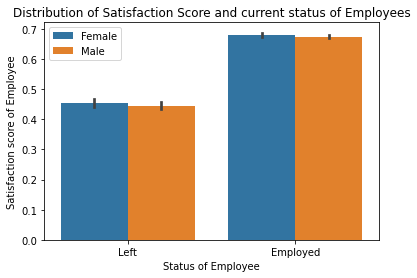

In [56]:
# Bar plot with day against tip
sns.barplot(x = 'status', y = 'satisfaction', data = Employee_df_final, hue = 'gender')
 
# Adding Title to the Plot
plt.title("Distribution of Satisfaction Score and current status of Employees")
 
# Setting the X and Y labels
plt.ylabel('Satisfaction score of Employee')
plt.xlabel('Status of Employee')
plt.legend()
plt.show()


It is seen that the satisfaction score has a direct impact of people leaving the company. As those with lower satisfaction score are more inclined to leave the company, irrespective of gender.

#### **Q3. What are the top 5 departments with the largest Attrition rate**

<AxesSubplot:>

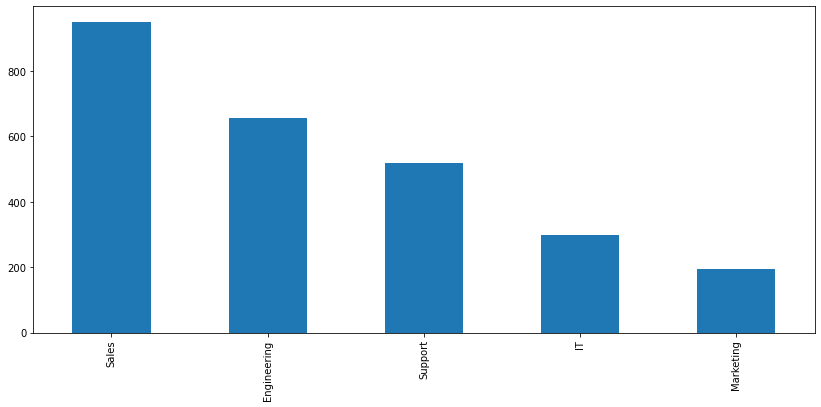

In [57]:
# Instantiate a figure of size of 14 x 7 inches
fig = plt.figure(figsize=[14, 6])

Employee_df_final[Employee_df_final['status']=='Left']['dept_name'].value_counts()[:5].plot(kind = 'bar')

It is observed that Sales, Engineering, Support, IT and Marketing have contributed the largest to the Attrition Rate of the company

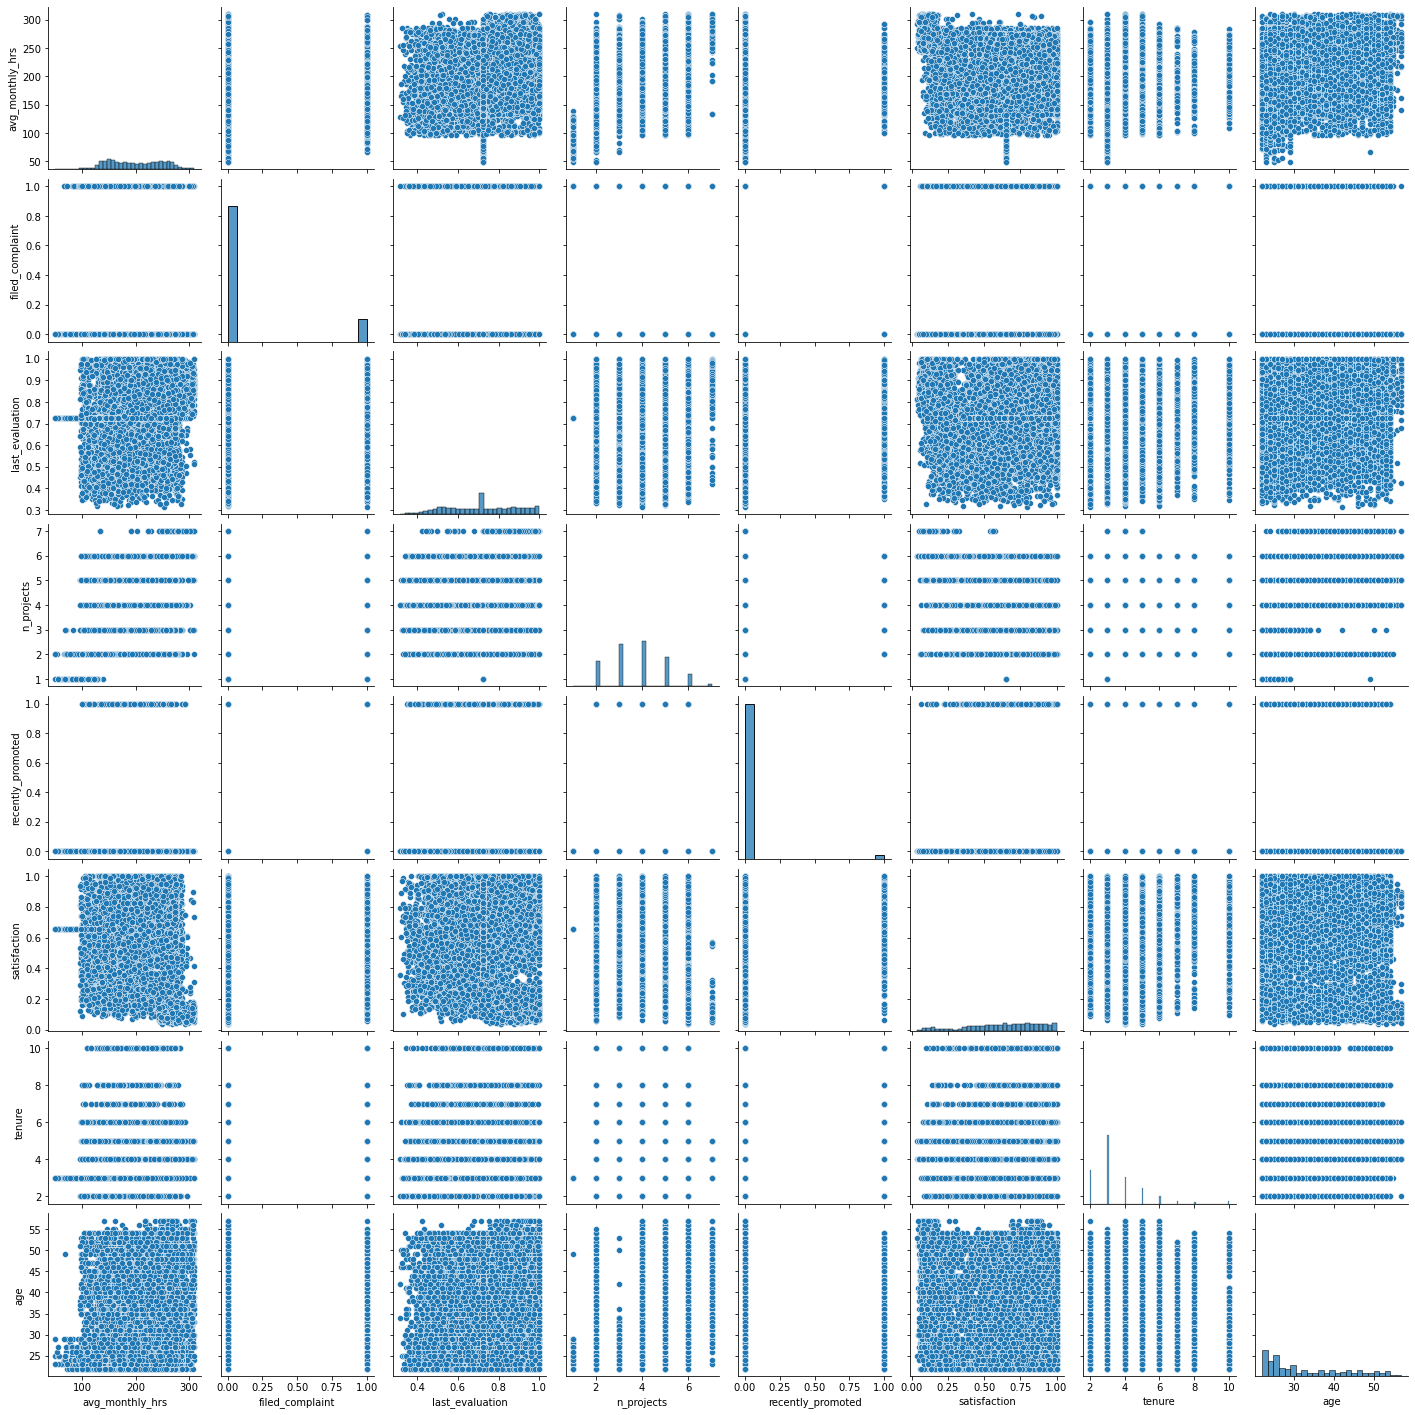

In [58]:
sns.pairplot(Employee_df_final)

#### **Q4. Is there a correlation between the tenure of an Employee and Attrition Rate?**

<AxesSubplot:xlabel='tenure'>

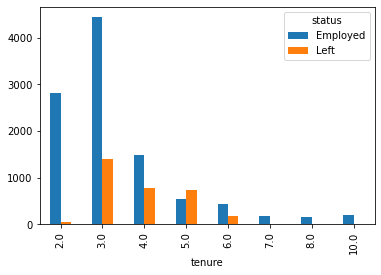

In [59]:
Employee_df_final.groupby(["tenure"])["status"].value_counts().unstack(level = -1).plot(kind="bar")

It is observed that Employees who have been associated with the company for 2 to 6 years have a tendency to leave with largest attrition happening around 3 years

#### **Q5. What is the distribution of Employees with respect to Salary in the organization?**

<AxesSubplot:xlabel='salary', ylabel='Count'>

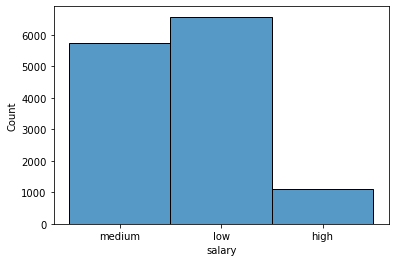

In [60]:
sns.histplot(x='salary', data=Employee_df_final)

#### **Q6. What is the Salary vs employment status of Employees in the company?**
Salary vs employment status 

<AxesSubplot:xlabel='salary'>

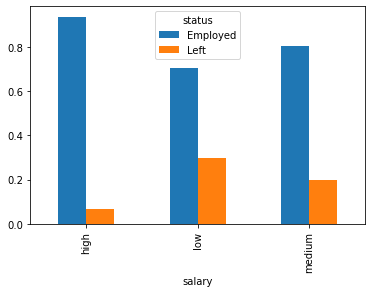

In [61]:
Employee_df_final.groupby(["salary"])["status"].value_counts(normalize = True).unstack(level = -1).plot(kind="bar")

#### **Q7. What is the Gender-wise distribution of the employees with lower satisfaction score who filed complaints?**

In [62]:
satisfaction_lessscore = Employee_df_final[(Employee_df_final['satisfaction'] < 0.5)]
satisfaction_lessscore.shape


(4044, 15)

Text(0.5, 0.98, 'Gender-wise Distribution for Employees who have filed complaints vs Attrition')

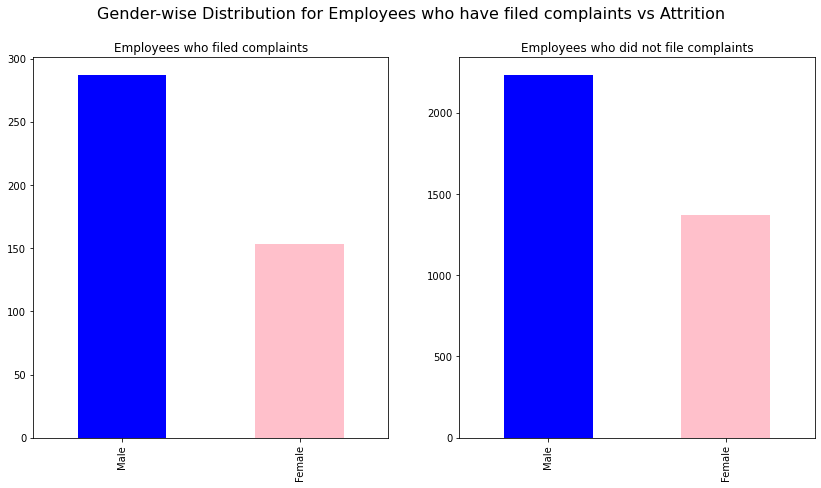

In [63]:
#Gender of the employees whose satisfaction score is below 0.5 who did filed complaints 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(14, 7))
zero_filed_complaint = satisfaction_lessscore[(satisfaction_lessscore['filed_complaint'] == 1)]
zero_filed_complaint['gender'].value_counts().plot(kind = 'bar', color=["blue","pink"], ax = ax1)
zero_filed_complaint['gender'].value_counts()


zero_filed_complaint = satisfaction_lessscore[(satisfaction_lessscore['filed_complaint'] == 0)]
zero_filed_complaint['gender'].value_counts().plot(kind = 'bar', color=["blue","pink"], ax = ax2)
zero_filed_complaint['gender'].value_counts()

ax1.set_title(label='Employees who filed complaints', size=12)
ax2.set_title(label='Employees who did not file complaints', size=12)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Gender-wise Distribution for Employees who have filed complaints vs Attrition', size=16)

There are 4044 employees with satisfaction score less than 0.5, of which only 10.9% of the employees filed complaints (287 Male and 153 Female).

It is observed that 43.5% of the total employees have 3 years of experience of which 28.4% are Male employees

#### **Q8. What is the relationship between marital status of an Employee vs Attrition rate of the company?**

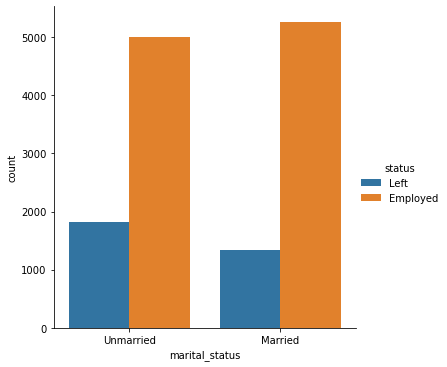

In [64]:

sns.catplot(x = 'marital_status', hue='status', kind = 'count', data = Employee_df_final)

There is not a large difference between married and unmarried employees and the rate of Attrition. It can, however, be observed that the number of unmarried people leaving the company is more in contrast with Married empoyees

#### **Q9. What is the relationship between Age of an employee vs the Attrition rate of the company?**

<AxesSubplot:xlabel='status', ylabel='age'>

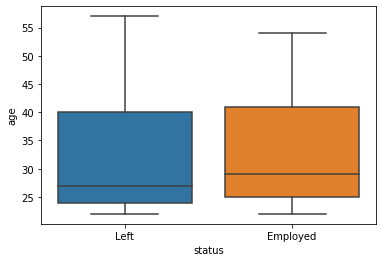

In [65]:
# Status vs Age
sns.boxplot(x='status', y = 'age', data = Employee_df_final)

There is not a large margin between Employee Age and their decision to leave the organization. It can be inferred that Employees have a tendency to leave the company up to 40 years of age.

**EDA Observations:**

Drop these columns as they are not required for ML Application:

- dept_name
- dept_head
- age
- gender
- marital status


In [66]:
#The Shape of the dataset before dropping the identifier columns
Employee_df_final.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'age', 'gender', 'marital_status', 'dept_name', 'dept_head'],
      dtype='object')

In [67]:
Employee_df_final['recently_promoted'] = Employee_df_final['recently_promoted'].astype(int)
Employee_df_final['filed_complaint'] = Employee_df_final['filed_complaint'].astype(int)

In [68]:
Employee_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13414 entries, 2 to 14120
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13414 non-null  float64
 1   department         13414 non-null  object 
 2   filed_complaint    13414 non-null  int32  
 3   last_evaluation    13414 non-null  float64
 4   n_projects         13414 non-null  int64  
 5   recently_promoted  13414 non-null  int32  
 6   salary             13414 non-null  object 
 7   satisfaction       13414 non-null  float64
 8   status             13414 non-null  object 
 9   tenure             13414 non-null  float64
 10  age                13414 non-null  float64
 11  gender             13414 non-null  object 
 12  marital_status     13414 non-null  object 
 13  dept_name          13414 non-null  object 
 14  dept_head          13414 non-null  object 
dtypes: float64(5), int32(2), int64(1), object(7)
memory usage: 2.0+ MB


In [69]:
#The Shape of the dataset after dropping the identifier columns and gender, marital_status which are not present in Unseen Dataset
Employee_df_final = Employee_df_final.drop(labels=['dept_name', 'dept_head', 'gender', 'marital_status', 'age'], axis=1)
Employee_df_final.shape

(13414, 10)

## **10. Data Encoding**

Variables Requiring Encoding:

- salary
- department

In [70]:
# Performing one hot encoding over gender, marital_status, dept_name and salary
data = pd.get_dummies(data=Employee_df_final, columns=['department', 'salary'], drop_first = True)
data.head(2)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,salary_low,salary_medium
2,156.0,1,0.474082,2,0,0.405101,Left,3.0,0,0,0,0,0,0,0,0,1,0,0,1
3,256.0,0,0.961360,6,0,0.152974,Left,4.0,0,0,0,0,0,0,0,1,0,0,1,0


In [71]:
# Instatiating input and output data by dropping unnecessary data features
X = data.drop(labels= ['status'], axis=1)
y = data['status']
print(X.shape)
print(y.shape)
X.head(2)



(13414, 19)
(13414,)


,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,salary_low,salary_medium
2,156.0,1,0.474082,2,0,0.405101,3.0,0,0,0,0,0,0,0,0,1,0,0,1
3,256.0,0,0.961360,6,0,0.152974,4.0,0,0,0,0,0,0,0,1,0,0,1,0


In [72]:
Employee_df_final.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure'],
      dtype='object')

## 11. Train and Test Split ##


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,  stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (10731, 19)
y_train shape:  (10731,)
X_test shape:  (2683, 19)
y_test shape:  (2683,)


## 12. Data Standardization ##




In [74]:
# Scaling of Training and Test Data using StandardScaler

scaler1 = StandardScaler().fit(X_train)
X_train = scaler1.transform(X_train)

scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

## 13. Building various models ##

In [75]:
# Building Basic Model without tuning

# Instantiating various classifiers
clfs = [KNeighborsClassifier(n_neighbors=6),
        RandomForestClassifier(random_state=42, class_weight='balanced'),
        GaussianNB(),
        LogisticRegression(random_state=0)]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using test data
  y_pred_train = clf.predict(X_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

  # Calculate the train accuracy of the model
  clf_train_accuracy = accuracy_score(y_train, y_pred_train)

  # Calculate the test accuracy of the model
  clf_accuracy = accuracy_score(y_test, y_pred)

  # Calculate the Classification Report
  clf_classifiction_report=classification_report(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metric of', model_name, ':')
  print('[Train Accuracy]:', clf_train_accuracy)
  print('[Test Accuracy]:', clf_accuracy)
  print('[Classification Report]:\n', clf_classifiction_report)
  print('----------------------------------------\n')




Performance Metric of KNeighborsClassifier :
[Train Accuracy]: 0.9519150125803746
[Test Accuracy]: 0.9388743943347
[Classification Report]:
               precision    recall  f1-score   support

    Employed       0.96      0.97      0.96      2052
        Left       0.88      0.85      0.87       631

    accuracy                           0.94      2683
   macro avg       0.92      0.91      0.91      2683
weighted avg       0.94      0.94      0.94      2683

----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 0.9998136240797689
[Test Accuracy]: 0.972418934029072
[Classification Report]:
               precision    recall  f1-score   support

    Employed       0.97      0.99      0.98      2052
        Left       0.97      0.91      0.94       631

    accuracy                           0.97      2683
   macro avg       0.97      0.95      0.96      2683
weighted avg       0.97      0.97      0.97      2683

------------------

 From the above accuracy results, **Random Forest Classifier** and **KNN** are giving good results. Since **Random Forest Classifier** model is giving better accuracy than the other, it seems the best fit for our Data from above comparison between different algorithm. Lets perform tuning and cross validation. 

## 14. Hyperparameter Tuning ##

In [76]:
# Creating a parameter grid for Random Forest
param_grid_rfc = { 'n_estimators': [80, 100, 120, 140, 200],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
                  'criterion' :['gini', 'entropy']}


# Putting the parameters in a list
param_grid = [param_grid_rfc]

i = 0

# Creating lists to store scores, models and parameters
best_scores = []
best_models = []
best_params = []

# Instantiating models
clfs = [RandomForestClassifier(random_state=42, class_weight='balanced')]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Applying GridSearchCV on the model
  cv = GridSearchCV(estimator=clf, param_grid=param_grid[i], cv= 5)

  # Calculating start time
  start_time = time.time()

  # Fitting the model in train set
  cv.fit(X_train, y_train)

  # Calculating evaluated time
  evaluated_time = time.time()-start_time

  # Append best score, parameters and models in lists
  best_scores.append(cv.best_score_)
  best_params.append(cv.best_params_)
  best_models.append(cv.best_estimator_)

  # Print time taken for tuning
  print('Time taken for tuning', model_name ,' is: ', np.round(evaluated_time, 2), 'sec')
  print('----------------------------------------\n')
  i += 1 

Time taken for tuning RandomForestClassifier  is:  1037.5 sec
----------------------------------------



In [77]:
print(cv.best_score_)
print(cv.best_params_)
print(cv.best_estimator_)

0.9731621009570995
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 140}
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='auto', n_estimators=140, random_state=42)


These are the best parameters we identified after tuning our RF model. We will evaluate the model further using these parameters.

## 15. Evaluation after Tuning ##

In [78]:
for clf in best_models:

  # Extracting model name
  model_name = type(clf).__name__
  
  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using test data
  y_pred_train = clf.predict(X_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

  # Calculate the train accuracy of the model
  clf_train_accuracy = accuracy_score(y_train, y_pred_train)

  # Calculate the test accuracy of the model
  clf_accuracy = accuracy_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metric of', model_name, ':')
  print('[Train Accuracy]:', clf_train_accuracy)
  print('[Test Accuracy]:', clf_accuracy)
  print('----------------------------------------\n')

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 0.9809896561364272
[Test Accuracy]: 0.9690644800596347
----------------------------------------



## 16. Cross-Validating the Models ##

In [79]:
# Creating list of cv scores
cv_train_scores = []
cv_test_scores = []
cv_test_mean = []

for clf in best_models:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculating scores using cross validation
  # Using KFold() with 5 folds
  scores = cross_validate(estimator=clf,
                          X=X_train,
                          y=y_train,
                          cv=KFold(n_splits=5, random_state=None), 
                          scoring='accuracy', 
                          return_train_score=True)

  # scores is a dictionary with keys like test_score, train_score, fit_time, etc
  # We will extract test_score and append it to our cv_scores list
  cv_train_scores.append(scores['train_score'])
  cv_test_scores.append(scores['test_score'])

  # Calculating the mean of scores for both the models
  cv_test_mean.append((scores['test_score'].mean()))

In [80]:
print(scores)

{'fit_time': array([1.12867546, 1.12508869, 1.1037519 , 1.12509441, 1.10965991]), 'score_time': array([0.03122139, 0.04683971, 0.04689455, 0.0468998 , 0.04683471]), 'test_score': array([0.96879367, 0.97343896, 0.97204101, 0.97809879, 0.96924511]), 'train_score': array([0.9832246 , 0.98136284, 0.98147932, 0.98182877, 0.98276063])}


## 17. Unseen Data Analysis ##

Downloaded a copy of unseen data from google docs onto the local machine and fed it into a data frame

In [81]:
import pandas as pd 
unseen_data = pd.read_csv("C:/Users/Asus/Documents/INSAID/GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv")

In [82]:
unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [83]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [84]:
unseen_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,100.000000,15.0,83.000000,100.000000,3.0,97.000000,97.000000,100.000000
mean,198.810000,1.0,0.744114,3.760000,1.0,0.629632,3.422680,112515.750000
std,53.185723,0.0,0.169536,1.349298,0.0,0.246901,1.566811,9466.676715
min,68.000000,1.0,0.396801,1.000000,1.0,0.051515,2.000000,100230.000000
25%,154.500000,1.0,0.576181,3.000000,1.0,0.477002,2.000000,105855.000000
50%,206.000000,1.0,0.748131,4.000000,1.0,0.660827,3.000000,110557.000000
75%,247.500000,1.0,0.901458,5.000000,1.0,0.832039,4.000000,117130.250000
max,289.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,145105.000000


In [85]:
unseen_data.shape

(100, 10)

In [86]:
unseen_data[unseen_data.duplicated()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id


In [87]:
unseen_data.isnull().sum()

avg_monthly_hrs       0
department            2
filed_complaint      85
last_evaluation      17
n_projects            0
recently_promoted    97
salary                0
satisfaction          3
tenure                3
employee_id           0
dtype: int64

***Observations:***
- Total **100** records with **10 features**. Target variable is to be predicted.
- **Age, gender and marital features** are missing in the unseen data but those are not necessary since we anyways dropped those columns in our train/test data.
- No duplicates found
- Some of the features have missing values. Lets replace with the best possible value according to the feature data type.

In [88]:
# Only 2 blank values in the department so lets replace with mode

unseen_data['department'].mode()

0    D00-SS
dtype: object

In [89]:
unseen_data['department'].fillna(value = 'D00-SS', inplace = True)

In [90]:
unseen_data['department'].value_counts()

D00-SS     29
D00-ENG    17
D00-SP     13
D00-IT      9
D00-PD      7
D00-MT      7
D00-FN      6
D00-MN      5
D00-TP      3
-IT         2
D00-AD      1
D00-PR      1
Name: department, dtype: int64

In [91]:
#converting "-IT" to "D00-IT"
unseen_data["department"] = unseen_data["department"].replace({"-IT":"D00-IT"}) 

In [92]:
unseen_data['department'].value_counts()

D00-SS     29
D00-ENG    17
D00-SP     13
D00-IT     11
D00-PD      7
D00-MT      7
D00-FN      6
D00-MN      5
D00-TP      3
D00-AD      1
D00-PR      1
Name: department, dtype: int64

In [93]:
# Its not necessary that everyone has to file a complaint or has to be promoted so lets replace the missing with 0

unseen_data['filed_complaint'].fillna(value =0, inplace = True)
unseen_data['recently_promoted'].fillna(value =0, inplace = True)

In [94]:
unseen_data.isnull().sum()

avg_monthly_hrs       0
department            0
filed_complaint       0
last_evaluation      17
n_projects            0
recently_promoted     0
salary                0
satisfaction          3
tenure                3
employee_id           0
dtype: int64

In [95]:
# Lets replace satisfaction, tenure and last_evaluation with median since continuous variables

unseen_data['last_evaluation'].median()


0.7481306185

In [96]:
unseen_data['satisfaction'].median()

0.6608272326

In [97]:
unseen_data['tenure'].median()

3.0

In [98]:
unseen_data['last_evaluation'].fillna(value =0.7481306185, inplace = True)
unseen_data['satisfaction'].fillna(value =0.6608272326, inplace = True)
unseen_data['tenure'].fillna(value =3.0, inplace = True)

In [99]:
unseen_data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
employee_id          0
dtype: int64

In [100]:
unseen_data.shape

(100, 10)

In [101]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    float64
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    float64
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [102]:
unseen_data["filed_complaint"] = unseen_data["filed_complaint"].astype('int')         
unseen_data["recently_promoted"] = unseen_data["recently_promoted"].astype('int')

In [103]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    int32  
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    int32  
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
 9   employee_id        100 non-null    int64  
dtypes: float64(3), int32(2), int64(3), object(2)
memory usage: 7.2+ KB


In [104]:
# Lets drop employee_id since it has no correlation and not needed
unseen_emp_id = unseen_data['employee_id']
unseen_emp_id.shape

(100,)

In [105]:
# Instatiating input and output data by dropping unnecessary data features
data2 = unseen_data.drop(labels= ['employee_id'], axis=1)
print(data2.shape)
data2.head(2)
data2.info()

(100, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    int32  
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    int32  
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
dtypes: float64(3), int32(2), int64(2), object(2)
memory usage: 6.4+ KB


In [106]:
final_model = pd.get_dummies(data= data2,columns=['department','salary'], drop_first=True)
final_model.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,salary_low,salary_medium
0,134,0,0.528841,2,0,0.400464,3.0,0,0,1,0,0,0,0,0,0,0,1,0
1,221,0,0.784561,2,0,0.759513,3.0,0,0,0,0,0,1,0,0,0,0,1,0
2,156,0,0.545183,2,0,0.336457,3.0,0,0,0,0,0,0,0,0,1,0,0,1
3,133,0,0.748131,4,0,0.832039,2.0,0,0,0,0,0,0,1,0,0,0,0,1
4,135,0,0.454637,2,0,0.320723,5.0,0,0,0,0,0,0,0,0,1,0,1,0


In [107]:
print(clf)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='auto', n_estimators=140, random_state=42)


## 18. Predict the label values using the earlier trained Random Forest Regression Model ##

In [108]:
# Predict the label values using trained model algorithm 
status_pred_rf = clf.predict(final_model)
status_pred_rf

array(['Left', 'Left', 'Employed', 'Left', 'Employed', 'Left', 'Left',
       'Left', 'Left', 'Left', 'Employed', 'Left', 'Employed', 'Left',
       'Left', 'Left', 'Left', 'Left', 'Left', 'Employed', 'Left',
       'Employed', 'Left', 'Employed', 'Left', 'Left', 'Employed', 'Left',
       'Left', 'Left', 'Left', 'Employed', 'Left', 'Employed', 'Left',
       'Left', 'Left', 'Employed', 'Left', 'Left', 'Left', 'Employed',
       'Left', 'Left', 'Left', 'Employed', 'Employed', 'Left', 'Left',
       'Left', 'Left', 'Left', 'Left', 'Left', 'Employed', 'Left', 'Left',
       'Left', 'Employed', 'Left', 'Left', 'Employed', 'Employed', 'Left',
       'Employed', 'Left', 'Left', 'Employed', 'Left', 'Employed',
       'Employed', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left',
       'Left', 'Employed', 'Left', 'Left', 'Employed', 'Employed',
       'Employed', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left',
       'Left', 'Left', 'Employed', 'Employed', 'Left', 'Left', 'Left'

In [109]:
# feeding array into a data frame
status_pred_rf = pd.DataFrame(status_pred_rf)
status_pred_rf.value_counts()
status_pred_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


### As instructed, lets prepare submission file that should contain only employee_id and prediction probability ###

In [110]:
submission_data = pd.concat([unseen_emp_id,status_pred_rf],axis=1)
submission_data.shape

(100, 2)

In [111]:
submission_data.head()

,employee_id,0
0,119045,Left
1,112223,Left
2,103924,Employed
3,105922,Left
4,103297,Employed


In [112]:
# Probability prediction on the submission data
sub_data_prob = clf.predict_proba(final_model)
sub_data_prob.shape

(100, 2)

In [113]:
# probabilities of employees that will leave vs still work
prob_employed = sub_data_prob[:,0]
prob_left = sub_data_prob[:,1]

In [114]:
prob_employed.shape

(100,)

In [115]:
prob_left.shape

(100,)

In [116]:
# adding prediction to the existing cleaned unseen data under a new data frame 
full_data = final_model.copy()
full_data["prediction"] = status_pred_rf
full_data.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,salary_low,salary_medium,prediction
0,134,0,0.528841,2,0,0.400464,3.0,0,0,1,0,0,0,0,0,0,0,1,0,Left
1,221,0,0.784561,2,0,0.759513,3.0,0,0,0,0,0,1,0,0,0,0,1,0,Left
2,156,0,0.545183,2,0,0.336457,3.0,0,0,0,0,0,0,0,0,1,0,0,1,Employed
3,133,0,0.748131,4,0,0.832039,2.0,0,0,0,0,0,0,1,0,0,0,0,1,Left
4,135,0,0.454637,2,0,0.320723,5.0,0,0,0,0,0,0,0,0,1,0,1,0,Employed


In [117]:
# replacing 'Left' with '1' and 'Employed' with '0' as per the instructions
full_data["prediction"] = full_data["prediction"].replace({"Left":"1"})
full_data["prediction"] = full_data["prediction"].replace({"Employed":"0"})

In [118]:
full_data.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,salary_low,salary_medium,prediction
0,134,0,0.528841,2,0,0.400464,3.0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,221,0,0.784561,2,0,0.759513,3.0,0,0,0,0,0,1,0,0,0,0,1,0,1
2,156,0,0.545183,2,0,0.336457,3.0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,133,0,0.748131,4,0,0.832039,2.0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,135,0,0.454637,2,0,0.320723,5.0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [119]:
# adding probability of the employees that will leave to full_data
full_data["probability"] = prob_left
full_data.shape

(100, 21)

In [120]:
full_data.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,salary_low,salary_medium,prediction,probability
0,134,0,0.528841,2,0,0.400464,3.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.582916
1,221,0,0.784561,2,0,0.759513,3.0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.567112
2,156,0,0.545183,2,0,0.336457,3.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.462375
3,133,0,0.748131,4,0,0.832039,2.0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.644839
4,135,0,0.454637,2,0,0.320723,5.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.431547


In [121]:
# Now lets put only 'employee_id' and 'probability' columns into a final data frame as per the instructions and write the data into a csv file
empID_plus_prob = pd.concat([unseen_emp_id,full_data["probability"]], axis=1)

In [122]:
empID_plus_prob.head()

,employee_id,probability
0,119045,0.582916
1,112223,0.567112
2,103924,0.462375
3,105922,0.644839
4,103297,0.431547


In [123]:
empID_plus_prob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  100 non-null    int64  
 1   probability  100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [126]:
# Just verifying to see if final submission data has only 2 columns
empID_plus_prob.shape

(100, 2)

In [125]:
# 100 records with only 2 features
empID_plus_prob.to_csv('1011_GCD_Captone_Project_Submission.csv', header = False, index = False)

## The data has been written into a csv file without header and index ##